In [40]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [41]:
import ast

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)



In [42]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [43]:
df_exploded = df.explode('job_skills')

In [44]:
df_exploded['job_skills']


0               None
1                  r
1             python
1                sql
1              nosql
             ...    
785739         kafka
785739    kubernetes
785739        docker
785740           aws
785740          flow
Name: job_skills, Length: 3777320, dtype: object

<Axes: xlabel='job_skills'>

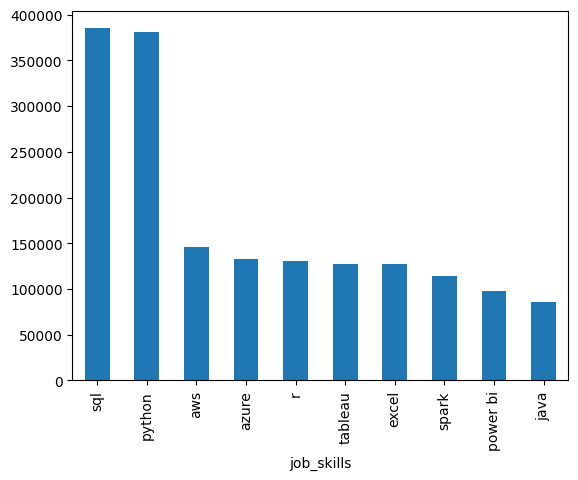

In [45]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [46]:
skill_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()
skill_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [47]:
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [50]:
df_skill_count.sort_values(by='skill_count',ascending=False, inplace=True)


In [51]:
df_skill_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
971,linode,Senior Data Analyst,1
969,linode,Data Engineer,1
1884,svelte,Cloud Engineer,1
927,kali,Senior Data Scientist,1


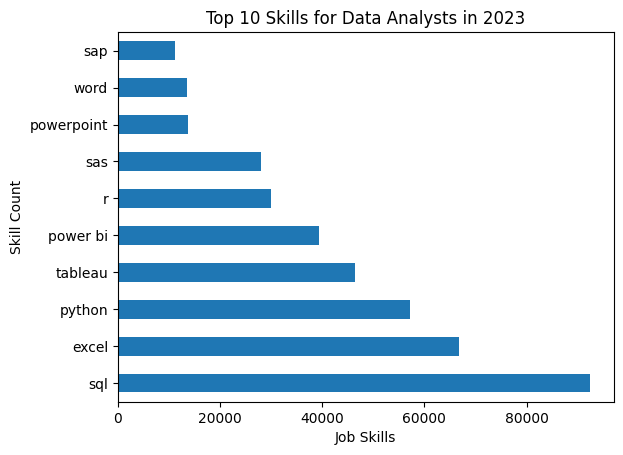

In [60]:
df_skill_final = df_skill_count[df_skill_count['job_title_short'] == 'Data Analyst'].head(10)
df_skill_final.plot(kind='barh', x = 'job_skills', y = 'skill_count')
plt.title('Top 10 Skills for Data Analysts in 2023')
plt.xlabel("Job Skills")
plt.ylabel('Skill Count')
plt.legend().set_visible(False)